In [1]:
import pandas as pd
import numpy as np

df_reads = pd.read_csv("./logs/log.csv", encoding = "utf-8")
display(df_reads)
display(df_reads.info())

,day,date,title,author,minutes
0,1,17-01-2026,O Conde de Monte Cristo,Alexandre Dumas,88
1,2,18-01-2026,O Conde de Monte Cristo,Alexandre Dumas,23
2,3,19-01-2026,O Conde de Monte Cristo,Alexandre Dumas,105
3,4,20-01-2026,O conde de monte cristo,Alexandre Dumas,60
4,5,21-01-2026,O conde de monte cristo,Alexandre Dumas,99
5,6,22-01-2026,O conde de monte cristo,Alexandre Dumas,137
6,7,23-01-2026,O conde de monte cristo,Alexandre Dumas,75
7,8,24-01-2026,o conde de monte cristo,alexandre dumas,82
8,9,25-01-2026,O conde de monte cristo,alexandre dumas,100
9,10,26-01-2026,o conde de monte cristo,alexandre dumas,92


<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   day      20 non-null     int64
 1   date     20 non-null     str  
 2   title    20 non-null     str  
 3   author   20 non-null     str  
 4   minutes  20 non-null     int64
dtypes: int64(2), str(3)
memory usage: 932.0 bytes


None

In [2]:
df_analise = df_reads
df_analise["date"] = pd.to_datetime(df_analise["date"], dayfirst = True)
df_analise["title"] = df_analise["title"].str.strip()
df_analise["title"] = df_analise["title"].str.title()
df_analise["author"] = df_analise["author"].str.strip()
df_analise["author"] = df_analise["author"].str.title()

display(df_analise)
display(df_analise.info())

,day,date,title,author,minutes
0,1,2026-01-17,O Conde De Monte Cristo,Alexandre Dumas,88
1,2,2026-01-18,O Conde De Monte Cristo,Alexandre Dumas,23
2,3,2026-01-19,O Conde De Monte Cristo,Alexandre Dumas,105
3,4,2026-01-20,O Conde De Monte Cristo,Alexandre Dumas,60
4,5,2026-01-21,O Conde De Monte Cristo,Alexandre Dumas,99
5,6,2026-01-22,O Conde De Monte Cristo,Alexandre Dumas,137
6,7,2026-01-23,O Conde De Monte Cristo,Alexandre Dumas,75
7,8,2026-01-24,O Conde De Monte Cristo,Alexandre Dumas,82
8,9,2026-01-25,O Conde De Monte Cristo,Alexandre Dumas,100
9,10,2026-01-26,O Conde De Monte Cristo,Alexandre Dumas,92


<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   day      20 non-null     int64         
 1   date     20 non-null     datetime64[us]
 2   title    20 non-null     str           
 3   author   20 non-null     str           
 4   minutes  20 non-null     int64         
dtypes: datetime64[us](1), int64(2), str(2)
memory usage: 932.0 bytes


None

In [3]:
df_analise["total minutes"] = df_analise["minutes"].cumsum()
df_analise["minutes per day"] = (df_analise["minutes"].cumsum() / df_analise["day"]).round(2)
df_analise["hours"] = (df_analise["minutes"] / 60).round(2)
df_analise["total hours"] = df_analise["hours"].cumsum()
df_analise["hours per day"] = (df_analise["hours"].cumsum() / df_analise["day"]).round(2)

df_most_read_books = df_analise.groupby("title")[["minutes", "hours"]].sum().sort_values("minutes", ascending=False)
df_most_read_books["days qtd"] = df_analise.groupby("title")["day"].count()

df_most_read_authors = df_analise.groupby("author")[["minutes", "hours"]].sum().sort_values("minutes", ascending=False)
df_most_read_authors["days qtd"] = df_analise.groupby("author")["day"].count()



display(df_analise)
display(df_analise.describe().round(2))
display(df_most_read_books)
display(df_most_read_authors)

,day,date,title,author,minutes,total minutes,minutes per day,hours,total hours,hours per day
0,1,2026-01-17,O Conde De Monte Cristo,Alexandre Dumas,88,88,88.00,1.47,1.47,1.47
1,2,2026-01-18,O Conde De Monte Cristo,Alexandre Dumas,23,111,55.50,0.38,1.85,0.92
2,3,2026-01-19,O Conde De Monte Cristo,Alexandre Dumas,105,216,72.00,1.75,3.60,1.20
3,4,2026-01-20,O Conde De Monte Cristo,Alexandre Dumas,60,276,69.00,1.00,4.60,1.15
4,5,2026-01-21,O Conde De Monte Cristo,Alexandre Dumas,99,375,75.00,1.65,6.25,1.25
5,6,2026-01-22,O Conde De Monte Cristo,Alexandre Dumas,137,512,85.33,2.28,8.53,1.42
6,7,2026-01-23,O Conde De Monte Cristo,Alexandre Dumas,75,587,83.86,1.25,9.78,1.40
7,8,2026-01-24,O Conde De Monte Cristo,Alexandre Dumas,82,669,83.62,1.37,11.15,1.39
8,9,2026-01-25,O Conde De Monte Cristo,Alexandre Dumas,100,769,85.44,1.67,12.82,1.42
9,10,2026-01-26,O Conde De Monte Cristo,Alexandre Dumas,92,861,86.10,1.53,14.35,1.43


,day,date,minutes,total minutes,minutes per day,hours,total hours,hours per day
count,20.00,20,20.00,20.00,20.00,20.00,20.00,20.00
mean,9.85,2026-01-25 20:24:00,82.95,859.75,83.87,1.38,14.32,1.40
min,1.00,2026-01-17 00:00:00,17.00,88.00,55.50,0.28,1.47,0.92
25%,5.75,2026-01-21 18:00:00,50.75,477.75,83.09,0.84,7.96,1.38
50%,10.50,2026-01-26 12:00:00,90.50,922.00,85.77,1.50,15.36,1.42
75%,14.00,2026-01-30 00:00:00,105.50,1163.25,89.22,1.76,19.38,1.49
max,17.00,2026-02-02 00:00:00,161.00,1659.00,97.59,2.68,27.63,1.63
std,5.12,NaN,44.07,489.74,9.63,0.73,8.16,0.16


,minutes,hours,days qtd
title,,,
O Conde De Monte Cristo,1603,26.70,17
Le Banquet,56,0.93,3


,minutes,hours,days qtd
author,,,
Alexandre Dumas,1603,26.70,17
Platão,56,0.93,3


dia da semana
Sunday        76.67
Monday        89.50
Tuesday       91.00
Wednesday    100.00
Thursday      59.00
Friday        60.33
Saturday     110.33
Name: minutes, dtype: float64

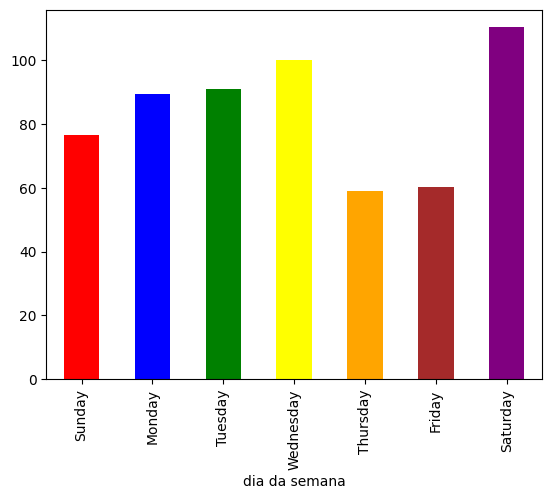

In [4]:
df = df_analise[["date", "minutes"]]
df["dia da semana"] = df["date"].dt.day_name()

ordem_dias = [
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 
    'Thursday', 'Friday', 'Saturday'
]

df["dia da semana"] = pd.Categorical(
    df["dia da semana"], 
    categories=ordem_dias, 
    ordered = True
)

color = ["red", "blue", "green", "yellow", "orange", "brown", "purple"]

df_graph = df.groupby("dia da semana")["minutes"].mean().round(2)
df_graph.plot( kind = "bar", color = color)

display(df_graph)